In [7]:
# iris_classifier.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Step 1: Load the dataset
df = pd.read_csv("C:/Users/Hp/Internship/IRIS.csv")

In [9]:
# Step 2: Encode species labels
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # setosa=0, versicolor=1, virginica=2

In [10]:
# Step 3: Features and target
X = df.drop('species', axis=1)
y = df['species']

In [11]:
# Step 4: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 5: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Step 6: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Step 7: Make predictions
y_pred = model.predict(X_test)

In [15]:
# Step 8: Evaluate the model
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

 Accuracy: 1.0

 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



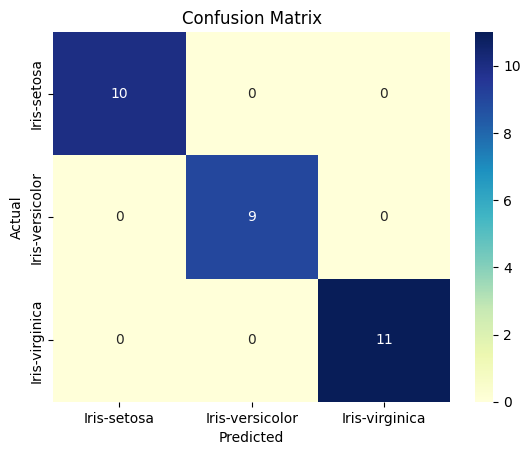

In [16]:
# Step 9: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Step 10: Predict on a new sample
sample_df = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
sample_scaled = scaler.transform(sample_df)
predicted_species = le.inverse_transform(model.predict(sample_scaled))[0]

print(f"\n Predicted species for sample input {sample_df.iloc[0].to_list()}: {predicted_species}")


 Predicted species for sample input [5.1, 3.5, 1.4, 0.2]: Iris-setosa
